# Индивиуальное задание

## Этап  № 4. Исследование моделей размещения пользователей и распространения сигнала

_Выполнил_ студент 2 курса<br>
учебной группы НММ-02-22<br>
Мулин Иван

### Цели


### Задача
Построить согласно описанному ниже алгоритму имитационную модель, позволяющую рассчитать вероятность блокировки линии прямой видимости, и сравнить полученную характеристику с результатами математической модели.
1. В квадратной области со стороной А согласно точечному Пуассоновскому процессу с плотностью q разместить объекты (окружности с фиксированным радиусом r), которые могут заблокировать линию прямой видимости между двумя точками, размещенными на расстоянии x друг от друга внутри обозначенной области. Проверить блокирует ли хотя бы один объект линию прямой видимости.
2. Количество блокирующих объектов определяется согласно распределению Пуассона с параметром qA2, а объекты вбрасываются независимо друг от друга. При этом центры блокирующих объектов должны быть распределены равномерно внутри рассматриваемой области.
3. На основе описанного выше алгоритма получить 1000 реализаций факта блокировки линии прямой видимости и рассчитать вероятность блокировки линии прямой видимости в поле блокирующих объектов. Полученный результат сравнить с результатами математической модели

### Ход работы

Подключаем библиотеки `numpy` и `matplotlib`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from numpy.linalg import norm
from numpy import arcsin, arccos, dot, cross, pi

In [24]:
SquareWidth = 10
PoissonParameter = 0.2
Radius = 0.3
TRDistance = 4
Points = np.array

In [25]:
angles = np.linspace(0, 2 * pi, 80)

In [26]:
def DrawCircle(x0, y0, r):
    """
    Draws a circle on a plot.
    """
    global angles
    xs = x0 + r*np.cos(angles)
    ys = y0 + r*np.sin(angles)
    plt.plot(xs, ys, color = "#eb3437")

In [27]:
def PoissonProcessInitializer(lam, area):
    """
    Initializes Poisson process
    """
    amount = np.random.poisson(lam * area**2)
    x = np.random.uniform(0, area, size=amount)
    y = np.random.uniform(0, area, size=amount)
    return x, y

In [28]:
def sign(x):
    " A mathematical sgn(x) "
    if x == 0:
        return 0
    return x/abs(x)

In [29]:
def GetRectangleCoords(p1x, p1y, p2x, p2y):
    """
    Calculates rectangle ABCD's coordinates
    """
    global TRDistance, Radius
    W = pi/2 - sign( arcsin((p2y-p1y)/TRDistance) ) * arccos((p2x-p1x)/TRDistance)
    RC, RS = Radius*np.cos(W), Radius*np.sin(W)

    Ax, Ay = p1x - RC, p1y + RS
    Bx, By = p1x + RC, p1y - RS
    Cx, Cy = p2x + RC, p2y - RS
    Dx, Dy = p2x - RC, p2y + RS

    return [Ax, Bx, Cx, Dx, Ax], [Ay, By, Cy, Dy, Ay]

In [30]:
W = 0.3
p1x, p1y = 1, 1
p2x, p2y = p1x + TRDistance*np.cos(W), p1y + TRDistance*np.sin(W)

Rectangle = np.array(GetRectangleCoords(p1x, p1y, p2x, p2y))

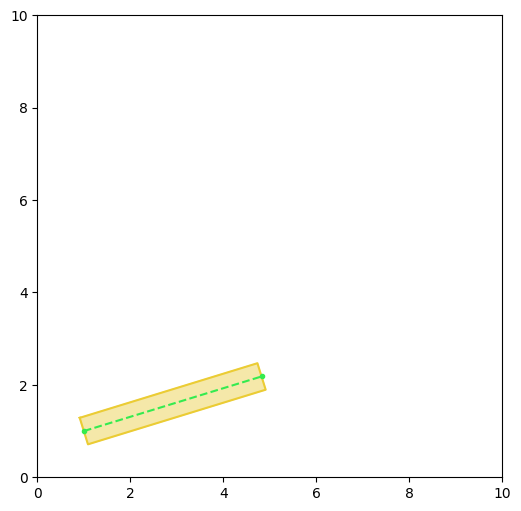

In [31]:
plt.figure(dpi=100, figsize=(6, 6))

plt.plot(Rectangle[0], Rectangle[1], color="#ebcc34")
plt.fill(Rectangle[0], Rectangle[1], color="#f5e8a9")
plt.plot((p1x, p2x), (p1y, p2y), marker=".", color="#34eb4f", linestyle="dashed")

plt.xlim(0, SquareWidth)
plt.ylim(0, SquareWidth)
plt.show()